**Q-learning: Grid world example**

**Author**: Chiron Bang 

**Contact:** [Twitter](https://twitter.com/chiron_bang), [Email](mailto:chironbang@gmail.com) (Don't hesitate to reach out may you have any question or comment ;) \) 

**Date created**: 03/09/2022

**Last modified**: 04/30/2022

**Summary**

Implementation of the Q-learning, Double Q-learning and Sarsa methods to determine the optimal policy for the grid world example. 

#Q-learning

**Imports**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Initialization

In [13]:
np.random.seed(0)


v_opt = [[2.80, 4.67, 7.78, 12.96, 21.6],
         [4.67, 7.78, 12.96, 21.6, 36],
         [7.78, 12.96, 21.6, 36.0, 60.0],
         [12.96, 21.6, 36.0, 60.0, 100],
         [21.6, 36.0, 60.0, 100, 0.0]]
v_opt = np.array(v_opt)
maze_size = (5,5)
start = [1,1]  
end = [4,4]
LEFT, RIGHT, UP, DOWN = 0, 1, 2, 3 # Moving Left, Right, Up, down
N_EPISODES = 1_000
epsilon = 0.1
gamma = 0.6 # change to 0.85 for Sarsa to converge
alpha = 0.9

maze = np.zeros(maze_size)
maze[start[0], start[1]] = -1 # -1 represents the agent  
maze[end[0], end[1]] = 1      # 1 represents the goal  
print("Maze\n",maze)



reward_table = 100 * maze
reward_table[start[0], start[1]] = 0
print("\nReward table:\n",reward_table)

Q_table = np.random.randint(size=(maze_size[0], maze_size[1], 4), low=0, high=100)
Q_table[end[0], end[1]] = 0
# print(Q_table)

opt_policy = np.zeros(maze_size)

Maze
 [[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]

Reward table:
 [[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 100.]]


## Utility functions

In [14]:
def move(curr_state, action):
    """
        Given the current state and the action performed, this function determines what will be the next state.
    """
    next_state = curr_state.copy()
    
    if action == LEFT: # Moving left
        next_state[1] = curr_state[1] - 1 
    elif action == RIGHT: # Moving right
        next_state[1] = curr_state[1] + 1
    elif action == UP: # Moving up
        next_state[0] = curr_state[0] - 1
    elif action == DOWN: # Moving down
        next_state[0] = curr_state[0] + 1
    else:
        print("Invalid move. Current state returned.")
        return curr_state
    
    l,c = maze_size

    in_bound = (next_state[0] >= 0) and (next_state[1] >= 0) and (next_state[0] <= l-1) and (next_state[1] <= c-1)
    return next_state if in_bound else curr_state
    

In [15]:
def choose_action(policy, state):
    """
        Chooses the next action given the current state and using the current policy
    """
    is_greedy = np.random.choice([False, True], p=[epsilon, 1-epsilon])
    if is_greedy:
        action = policy[state[0], state[1]]
    else:
        action = np.random.choice([LEFT, RIGHT, UP, DOWN])
        
    return int(action)
        

## Estimating $\pi_*$

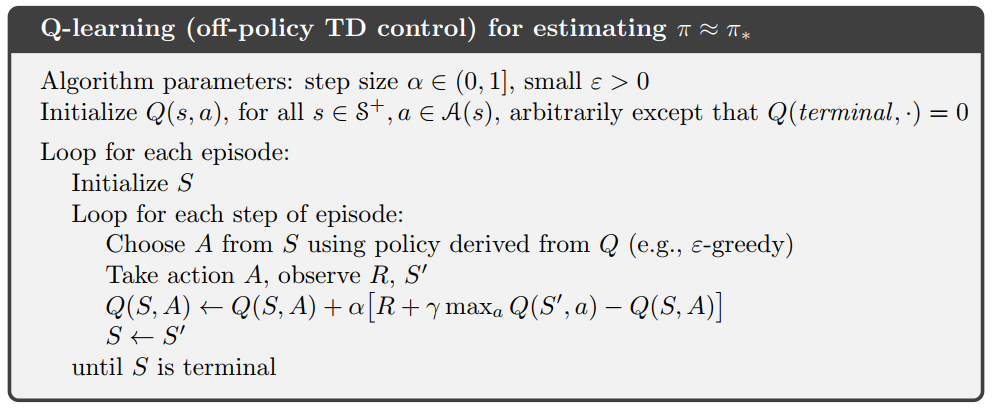

In [16]:
def update_Q(Q, curr_state, next_state, action, reward):
    """
    Updates the values of the Q table.
    """
    Q[curr_state[0], curr_state[1], action] = (1-alpha) * Q[curr_state[0], curr_state[1], action] + alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]))
    
    return Q

In [17]:
def update_policy(Q):
    """
    Updates the policy which is greedy with respect to Q.
    """
    return np.argmax(Q, axis=-1)
    

In [18]:
# Estimation of the optimal policy 

all_steps_to_go = [] # Stores the number of steps to reach the goal state from the start state
all_v = []           # Stores the V values at the end of each episode

for i in range(N_EPISODES):
    curr_state = start.copy()
    success = False
    n_steps = 0
    opt_policy = update_policy(Q_table)

    while not success:        
        action = choose_action(opt_policy, curr_state)
        next_state = move(curr_state, action)
        reward = reward_table[next_state[0], next_state[1]]
        
        Q_table = update_Q(Q_table, curr_state, next_state, action, reward)
        opt_policy = update_policy(Q_table)
        

        curr_state[0], curr_state[1] = next_state[0], next_state[1]        
        n_steps += 1
        
        if (curr_state[0] == end[0]) and (curr_state[1] == end[1]):
            success = True
            all_steps_to_go.append(n_steps)
            all_v.append(np.max(Q_table, axis=-1))          

sqe = np.sum(np.square(all_v[:-1] - v_opt),axis=(1,2))

In [19]:
# Computes the sum of squared error for each episode. 
sqe = np.sum(np.square(all_v - v_opt),axis=(1,2)) 

## Curves Plotting

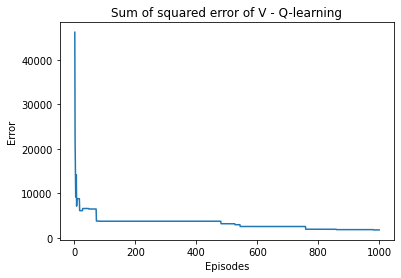

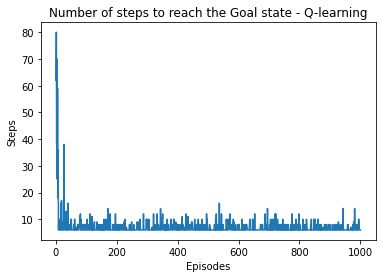

In [20]:
plt.plot(range(1, N_EPISODES+1), sqe)
plt.xlabel('Episodes')
plt.ylabel('Error')
plt.title('Sum of squared error of V - Q-learning')

plt.figure()

plt.plot(range(1, N_EPISODES+1), all_steps_to_go)
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Number of steps to reach the Goal state - Q-learning')

plt.show()

In [21]:
print("Steps-to-goal for the 10 last episodes (optimal number of steps is 6): ",all_steps_to_go[-10:])

Steps-to-goal for the 10 last episodes (optimal number of steps is 6):  [6, 6, 6, 10, 10, 6, 6, 6, 6, 6]


In [22]:
mean = np.mean(all_steps_to_go[-100:])
print("Average number of steps per episode for the last 100 episodes: ",mean)

Average number of steps per episode for the last 100 episodes:  6.63


In [23]:
print("V* table: \n" ,np.round(all_v[-1], 2))

V* table: 
 [[ 2  4  2  3  3]
 [ 4  7 11  6  4]
 [ 7 12 20 35 59]
 [12 20 35 59 99]
 [21 35 59 99  0]]


In [24]:
print("Theoritical V table\n",v_opt)

Theoritical V table
 [[  2.8    4.67   7.78  12.96  21.6 ]
 [  4.67   7.78  12.96  21.6   36.  ]
 [  7.78  12.96  21.6   36.    60.  ]
 [ 12.96  21.6   36.    60.   100.  ]
 [ 21.6   36.    60.   100.     0.  ]]


In [25]:
print("Optimal policy:\n", opt_policy)

Optimal policy:
 [[1 3 0 3 1]
 [1 3 3 0 1]
 [1 3 3 1 3]
 [1 1 1 1 3]
 [1 1 1 1 0]]


#Double Q-learning

## Initialization

In [26]:
# N_EPISODES = 2_000
np.random.seed(0)

Q1_table = np.random.randint(size=(maze_size[0], maze_size[1], 4), low=0, high=100)
Q2_table = np.random.randint(size=(maze_size[0], maze_size[1], 4), low=0, high=100)
Q1_table[end[0], end[1]] = 0
Q2_table[end[0], end[1]] = 0
# V_opt2 = np.zeros(maze_size)
opt_policy2 = update_policy((Q1_table + Q2_table)*0.5)

## Estimation of $q_*$

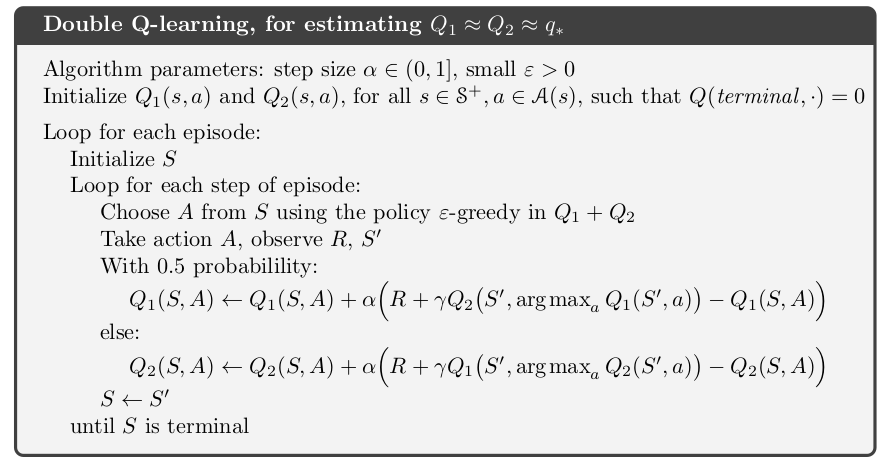

In [27]:
def update_double_Q(Q1, Q2, curr_state, next_state, action, reward):

    is_q1 = np.random.choice([True, False])

    if is_q1:
        old_q1 = Q1[curr_state[0], curr_state[1], action]
        temp1 = reward + gamma * Q2[next_state[0], next_state[1], np.argmax(Q1[next_state[0], next_state[1]])] - old_q1
        Q1[curr_state[0], curr_state[1], action] = old_q1 + alpha * temp1
    else:
        old_q2 = Q2[curr_state[0], curr_state[1], action]
        temp2 = reward + gamma * Q1[next_state[0], next_state[1], np.argmax(Q2[next_state[0], next_state[1]])] - old_q2
        Q2[curr_state[0], curr_state[1], action] = old_q2 + alpha * temp2
    
    return Q1, Q2


In [28]:
all_steps_to_go2 = [] # Stores the number of steps to reach the goal state from the start state
all_v2 = []           # Stores the V values at the end of each episode

for i in range(N_EPISODES):
    curr_state = start.copy()
    success = False
    n_steps = 0
    opt_policy2 = update_policy((Q1_table + Q2_table)*0.5) 

    while not success:        
        action = choose_action(opt_policy2, curr_state)
        next_state = move(curr_state, action)
        reward = reward_table[next_state[0], next_state[1]]
        
        Q1_table, Q2_table = update_double_Q(Q1_table, Q2_table, curr_state, next_state, action, reward)
        opt_policy2 = update_policy((Q1_table + Q2_table)*0.5)
        
        curr_state[0], curr_state[1] = next_state[0], next_state[1]        
        n_steps += 1
        
        if curr_state[0] == end[0] and curr_state[1] == end[1]:
            success = True
            all_steps_to_go2.append(n_steps)
            all_v2.append(np.max(Q1_table, axis=-1))
    

## Curves Plotting

In [29]:
# Compution the sum of squared error for each episode. 
sqe2 = np.sum(np.square(all_v2 - v_opt),axis=(1,2))

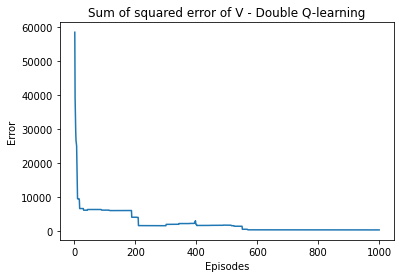

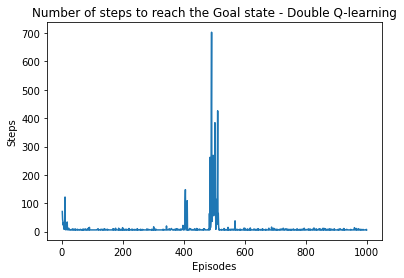

In [30]:
plt.plot(range(1,(N_EPISODES)+1), sqe2)
plt.xlabel('Episodes')
plt.ylabel('Error')
plt.title('Sum of squared error of V - Double Q-learning')

plt.figure()

plt.plot(range(1,(N_EPISODES)+1), all_steps_to_go2)
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Number of steps to reach the Goal state - Double Q-learning')

plt.show()

In [31]:
print("Steps to go for the 20 last episodes (optimal steps to go is 6): ",all_steps_to_go2[-10:])

Steps to go for the 20 last episodes (optimal steps to go is 6):  [6, 6, 6, 6, 6, 6, 6, 7, 8, 6]


In [32]:
mean = np.mean(all_steps_to_go2[-100:])
print("Average number of steps per episode for the last 100 episodes: ",mean)

Average number of steps per episode for the last 100 episodes:  6.65


In [33]:
print("V* table: \n" ,np.round(all_v2[-1], 2))

V* table: 
 [[ 1  0  6 11 20]
 [ 3  6 11 20 35]
 [ 0 11  5 35 59]
 [11 20 35 59 99]
 [20 35 59 99  0]]


In [34]:
print("Theoritical V table\n",v_opt)

Theoritical V table
 [[  2.8    4.67   7.78  12.96  21.6 ]
 [  4.67   7.78  12.96  21.6   36.  ]
 [  7.78  12.96  21.6   36.    60.  ]
 [ 12.96  21.6   36.    60.   100.  ]
 [ 21.6   36.    60.   100.     0.  ]]


In [35]:
print("Optimal policy:\n", opt_policy2)

Optimal policy:
 [[3 0 3 1 3]
 [1 1 1 1 3]
 [0 3 3 1 3]
 [1 3 3 3 3]
 [1 1 1 1 0]]


#SARSA

## Initialization

In [36]:
N_EPISODES = 1000
# gamma = 0.9
np.random.seed(0)

Q3_table = np.random.randint(size=(maze_size[0], maze_size[1], 4), low=0, high=100)
Q3_table[end[0], end[1]] = 0
# V_opt3 = np.zeros(maze_size)
opt_policy3 = np.zeros(maze_size)

## Estimating $q_*$

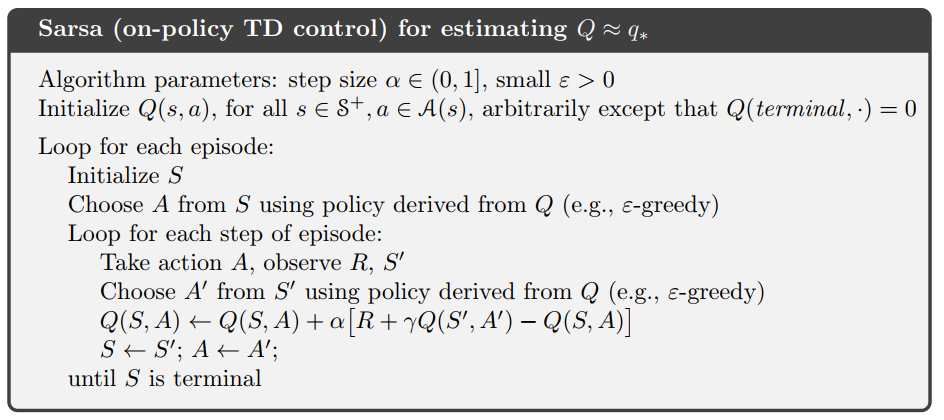

In [37]:
def update_Q_sarsa(Q, curr_state, next_state, curr_action, next_action, reward):
    """
    Update an entry in the Q table.
    """
    Q[curr_state[0], curr_state[1], curr_action] = (1-alpha) * Q[curr_state[0], curr_state[1], curr_action] + alpha * (reward + gamma * Q[next_state[0], next_state[1], next_action])
    
    return Q

In [38]:

all_steps_to_go3 = []   # Stores the number of steps to reach the goal state from the start state
all_v3 = []             # Stores the V values at the end of each episode

for i in range(N_EPISODES):
    curr_state = start.copy()
    success = False
    n_steps = 0

    opt_policy3 = np.argmax(Q3_table, axis=-1)
    curr_action = choose_action(opt_policy3, curr_state)

    while not success:        
        next_state = move(curr_state, curr_action)
        reward = reward_table[next_state[0], next_state[1]]
        
        next_action = choose_action(opt_policy3, next_state)

        Q3_table = update_Q_sarsa(Q3_table, curr_state, next_state, curr_action, next_action, reward)
        opt_policy3 = update_policy(Q3_table)
        
        curr_state[0], curr_state[1] = next_state[0], next_state[1]
        curr_action = next_action      
        n_steps += 1
        
        if curr_state[0] == end[0] and curr_state[1] == end[1]:
            success = True
            all_steps_to_go3.append(n_steps)
            all_v3.append(np.max(Q3_table, axis=-1))   

## Curves Plotting

In [39]:
# Computes the sum of squared error for each episode. 
sqe3 = np.sum(np.square(all_v3 - v_opt),axis=(1,2))

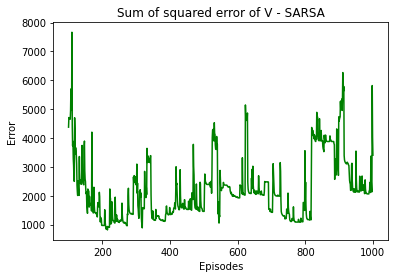

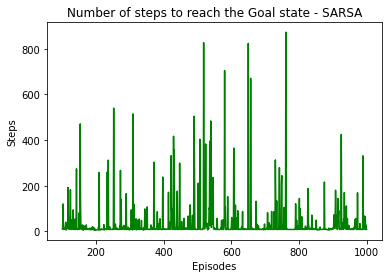

In [40]:
plt.plot(range(100, N_EPISODES+1), sqe3[99:], color='green')
plt.xlabel('Episodes')
plt.ylabel('Error')
plt.title('Sum of squared error of V - SARSA')

plt.figure()

plt.plot(range(100, N_EPISODES+1), all_steps_to_go3[99:], color='green')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Number of steps to reach the Goal state - SARSA')

plt.show()

In [41]:
print("Steps-to-goal for the 10 last episodes (optimal number of steps is 6): ",all_steps_to_go3[-10:])

Steps-to-goal for the 10 last episodes (optimal number of steps is 6):  [12, 68, 44, 10, 8, 65, 8, 27, 8, 9]


In [42]:
print("V* table: \n", np.round(all_v3[-1], 2))

V* table: 
 [[ 0  0  0  0 18]
 [ 2  0  0 19 35]
 [ 0  3  1 32 59]
 [ 3 19 32 17 99]
 [ 5 30 58 99  0]]


In [43]:
print("Theoritical V table\n",v_opt)

Theoritical V table
 [[  2.8    4.67   7.78  12.96  21.6 ]
 [  4.67   7.78  12.96  21.6   36.  ]
 [  7.78  12.96  21.6   36.    60.  ]
 [ 12.96  21.6   36.    60.   100.  ]
 [ 21.6   36.    60.   100.     0.  ]]


In [44]:
print("Optimal policy:\n", opt_policy3)

Optimal policy:
 [[0 0 0 0 3]
 [3 0 0 3 3]
 [0 0 0 1 3]
 [3 1 1 1 3]
 [1 1 1 1 0]]


In [45]:
mean = np.mean(all_steps_to_go3[-100:])
print("Average number of steps per episode for the last 100 episodes: ",mean)

Average number of steps per episode for the last 100 episodes:  35.15


# Comparison

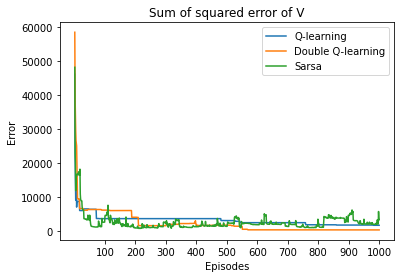

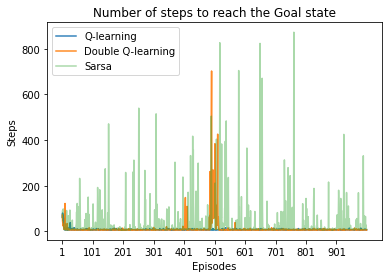

In [46]:
# plt.figure(figsize=(10,10))
plt.plot(range(1, N_EPISODES+1), sqe, alpha=1)
plt.plot(range(1, N_EPISODES+1), sqe2, alpha=1)
plt.plot(range(1, N_EPISODES+1), sqe3, alpha=1)

plt.xticks(np.arange(100, N_EPISODES+1, 100))
# plt.yticks(np.arange(0, np.max(sqe3[99:]), 500))

plt.xlabel('Episodes')
plt.ylabel('Error')
plt.title('Sum of squared error of V')
plt.legend(['Q-learning', 'Double Q-learning', 'Sarsa'])


plt.figure()
plt.plot(range(1, N_EPISODES+1), all_steps_to_go, alpha=0.9)
plt.plot(range(1, N_EPISODES+1), all_steps_to_go2, alpha=0.9)
plt.plot(range(1, N_EPISODES+1), all_steps_to_go3, alpha=0.4)
plt.legend(['Q-learning', 'Double Q-learning', 'Sarsa'])
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Number of steps to reach the Goal state')
# plt.ylim([0,20])

plt.xticks(np.arange(1, N_EPISODES+1, 100))
# plt.yticks(np.arange(0, 20, 2))

plt.show()